In [1]:
import numpy as np
import json

In [2]:
dir_1 = '/home/jzh/Dropbox/tsp_rev_refs/figs/'

In [3]:
N_list = [2, 3, 4, 5, 6, 7, 8]
beta_list = [0.1, 0.01, 0.001, 0.0001, 0.00001]
k_list = range(21)[1:]

save_data_dict = {}

for N in N_list:
    for beta in beta_list:
        for k in k_list:
            with open(dir_1 + 'eta_KL_mb_N_%s_beta_%s_k_%s.json'%(N, beta, k), 'r') as json_file:
                save_data_dict[(N, beta, k)] = json.load(json_file)

In [4]:
err_sv_dict = {}
err_wc_1_dict = {}
err_wc_2_dict = {}

for N in N_list:
    err_sv_dict[N] = {}
    err_wc_1_dict[N] = {}
    err_wc_2_dict[N] = {}
    for beta in beta_list:
        for k in k_list:
            len_eta_lis = len(save_data_dict[(N, beta, k)]['eta_Sanov'])
            err_sv_dict[N][(beta, k)] = np.mean([(save_data_dict[(N, beta, k)]['eta_Sanov'][idx] - \
                                                  save_data_dict[(N, beta, k)]['eta_actual'][idx]) ** 2 \
                                                 for idx in xrange(len_eta_lis)])
            err_wc_1_dict[N][(beta, k)] = np.mean([(save_data_dict[(N, beta, k)]['eta_wc_1'][idx] - \
                                                    save_data_dict[(N, beta, k)]['eta_actual'][idx]) ** 2 \
                                                   for idx in xrange(len_eta_lis)])
            err_wc_2_dict[N][(beta, k)] = np.mean([(save_data_dict[(N, beta, k)]['eta_wc_2'][idx] - \
                                                    save_data_dict[(N, beta, k)]['eta_actual'][idx]) ** 2 \
                                                   for idx in xrange(len_eta_lis)])

In [5]:
err_sv_avg_dict = {}
err_wc_1_avg_dict = {}
err_wc_2_avg_dict = {}
    
for N in N_list:
    err_sv_avg_dict[N] = np.mean(err_sv_dict[N].values())
    err_wc_1_avg_dict[N] = np.mean(err_wc_1_dict[N].values())
    err_wc_2_avg_dict[N] = np.mean(err_wc_2_dict[N].values())

In [6]:
err_sv_avg_dict, err_wc_1_avg_dict, err_wc_2_avg_dict

({2: 0.039354547406765,
  3: 0.016707732960784833,
  4: 0.022453230366105158,
  5: 0.027953204345236338,
  6: 0.030444132510540459,
  7: 0.03015216123313464,
  8: 0.030155225716309787},
 {2: 0.025659144542297108,
  3: 0.0050426450265735256,
  4: 0.0012070440261558798,
  5: 0.00094804118963911208,
  6: 0.00044446181024135686,
  7: 0.00029656417276088392,
  8: 0.0002374154935181876},
 {2: 0.17208986330651022,
  3: 0.01761527093640719,
  4: 0.017423677079545442,
  5: 0.0019578629207516415,
  6: 0.00094609176667954345,
  7: 0.00066981245520556453,
  8: 0.00027147167455379722})

In [7]:
%matplotlib inline

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


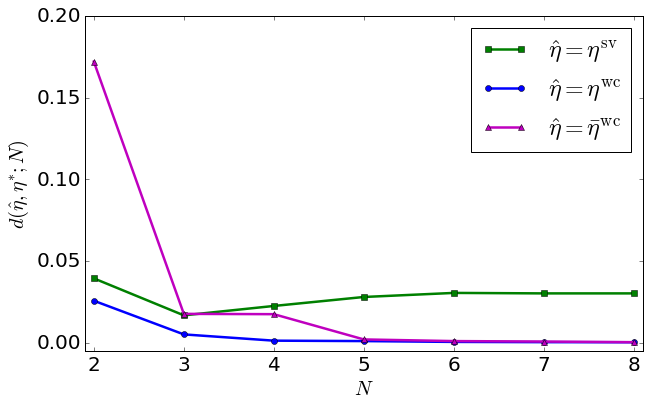

In [8]:
import matplotlib.pyplot as plt
import pylab
from pylab import *

font = {'family': 'normal',
        'weight': 'normal',
        'size': 20}

plt.figure(figsize=(10, 6))

matplotlib.rc('font', **font)
        
err_sv_avg, = plt.plot(N_list, [err_sv_avg_dict[N] for N in N_list], "g-s", linewidth=2.5)
err_wc_1_avg, = plt.plot(N_list, [err_wc_1_avg_dict[N] for N in N_list], "b-o", linewidth=2.5)
err_wc_2_avg, = plt.plot(N_list, [err_wc_2_avg_dict[N] for N in N_list], "m-^", linewidth=2.5)

plt.legend([err_sv_avg, err_wc_1_avg, err_wc_2_avg], [r"$\hat \eta = \eta^{\mathrm{sv}}$", \
                                                      r"$\hat \eta = \eta^{\mathrm{wc}}$", \
                                                      r"$\hat \eta = \bar \eta^{\mathrm{wc}}$"])
plt.xlabel("$N$")
plt.ylabel("$d( {\hat \eta ,\eta^{*} ;N} )$")
# plt.title('Threshold ($\eta$) versus Number of samples ($n$)')
pylab.xlim(np.amin(N_list) - 0.1, np.amax(N_list) + 0.1)
plt.xticks(N_list)
pylab.ylim(-0.005, 0.2)

savefig(dir_1 + 'err_comp_mb.eps')

plt.show()